In [103]:
import os
import json
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [104]:
os.chdir("/home/kiprono/Desktop/folder")

In [105]:
all_images = os.listdir(os.getcwd())
all_images

['20130320T005545.911690.Cam6_41.png',
 '0002-11646-140-81.jpg',
 '20151124T032316.443951_i2276j777.png',
 '20151124T024554.797812_i1789j736.png',
 '_MG_7954_24.jpg',
 '20151124T030924.623643_i2287j325.png',
 '20130320T013026.525827_62.png']

In [73]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/\
Masters by Research/Mask RCNN/Annotation projects/fruits/val")

In [86]:
with open ("via_project_fruits.json","r") as f:
    data = f.read()

In [87]:
data = json.loads(data)

In [94]:
annotations = list(data.values())

In [96]:
len(annotations[0]["regions"])

2

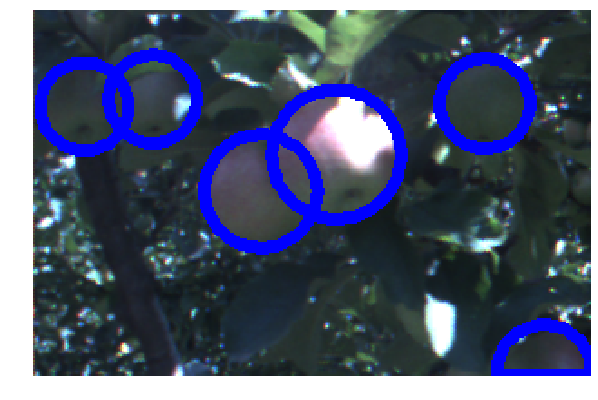

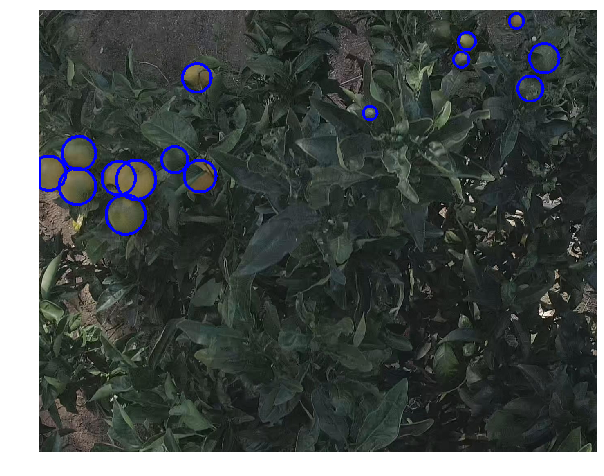

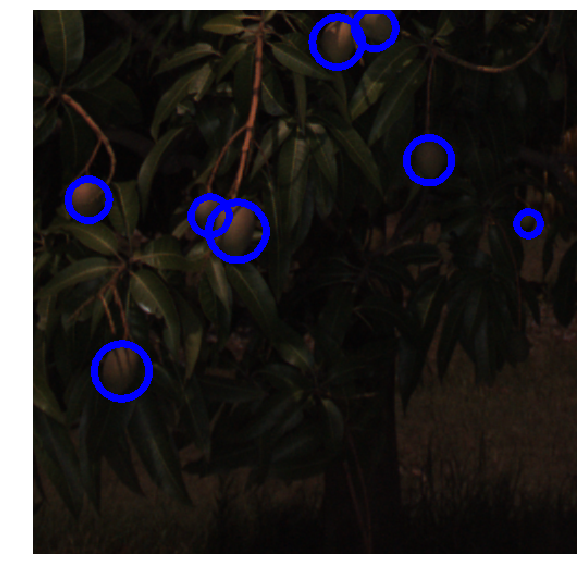

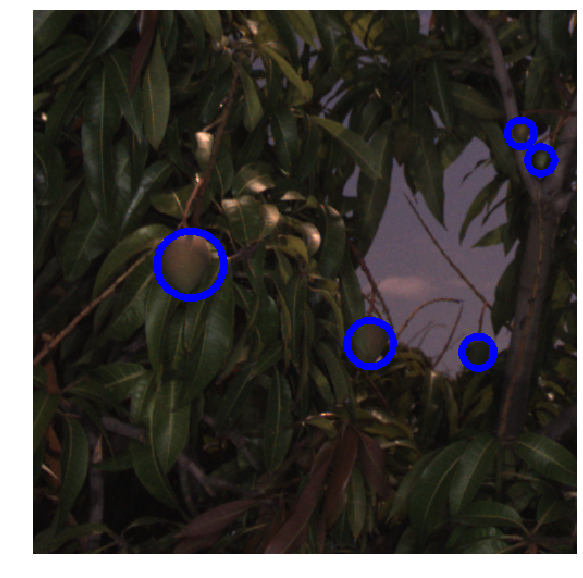

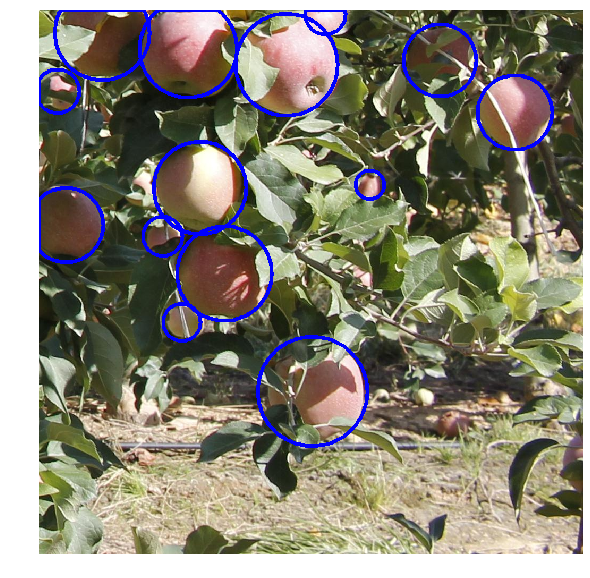

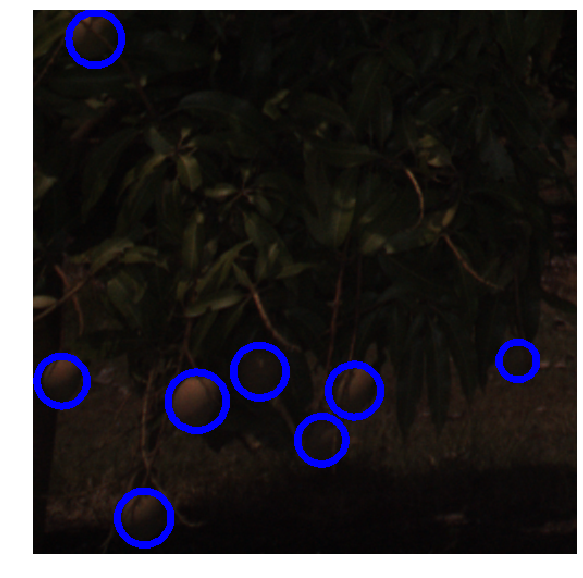

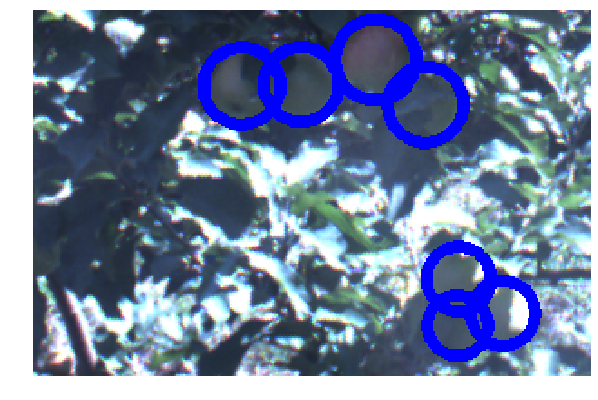

In [107]:

for name in all_images:
    image = cv.imread(name)
    for i in range(len(annotations)):
        if annotations[i]["filename"]==name:
        #print(annotations[i])
            a = annotations[i]
            for m in range(len(annotations[i]["regions"])):
                x = a["regions"][m]["shape_attributes"]["all_points_x"]
                y = a["regions"][m]["shape_attributes"]["all_points_y"]
                #print(reg_x,reg_y)
                pts = []
                for j,k in zip(x,y):
                    pts.append([j,k])
                pts = np.array(pts)
                #print(pts)
                img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=5)
            img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            plt.figure(figsize=(10,10))
            plt.axis("off")
            plt.imshow(img)
            plt.savefig(os.path.join("/home/kiprono/Desktop/","prediction"+name))
        else:
            continue
    #_MG_7954_24

In [ ]:
file = random.choice(list(meta_fuji["filename"].unique()))
example = (meta_fuji.loc[meta_fuji["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(example.loc[1]["filename"])
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except KeyError as s:
    print("No instance to display")